# Exemple amb Isolation Forest per a la detecció d'anomalies

Disposem del fitxer `carros_usados.csv` amb dades, **ja normalitzades**, sobre el preu de venda de cotxes utilitzats segons el seu quilometratge. Es contemplaran, per tant, dues característiques: el preu del cotxe i els quilòmetres que té.

L'objectiu amb aquest fitxer serà realitzar-ne una exploració, visualitzar les dades i detectar els diferents outliers.

In [91]:
# En primer lloc, carreguem les llibreries necessàries i el fitxer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

cotxes = pd.read_csv('./carros_usados.csv')
cotxes


,kms,precio
0,0.0373,1.0000
1,0.0801,0.9025
2,0.1405,0.5740
3,0.1775,0.7396
4,0.1627,0.6292
...,...,...
73,1.0000,0.2373
74,1.0000,0.1373
75,0.0000,0.9999
76,0.0100,0.9099


In [92]:
# Explorem les propietats del conjunt de dades

print(cotxes.shape) # Forma de la matriu (78 files per dues columnes)
print(cotxes.size)  # Nombre total d'elements (156 dades en total)

(78, 2)
156


## Visualització de les dades

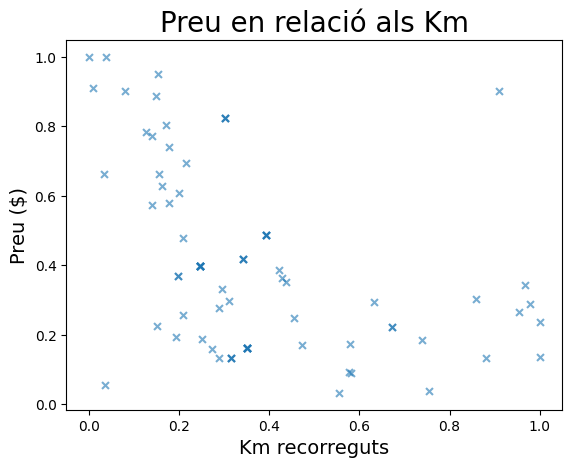

In [93]:
# Representem les dades en un gràfic dispers

plt.scatter(cotxes['kms'], cotxes['precio'], marker="x", s=25, alpha=0.6)
plt.ylabel("Preu ($)", size=14)
plt.xlabel("Km recorreguts", size=14)
plt.title("Preu en relació als Km", size=20)
plt.show()

Com podem observar, a simple vista, ja apareixen algunes dades que podriem considerar anòmales. Anem a veure ara com aplicar el procediment IsolationForest per detercar-los.

Anem a provar els boscos d'aïllament fent ús de 3 nivells de contaminació: 0.01, 0.05 i 1. 

Per a això definirem un vector amb 3 columnes, per guardar 3 nivells de contaminació, o en nomenclatura d'aquest mètode, tres boscos d'aïllament. Aquest vector que s'inicialitzarà a zero, guardarà un 1 si la dada és normal o -1 si es considera anòmala.

Per tant tindrem un array de dimensions 3 columnes per 78 files, on cada columna representa un nivell de contaminació de l'arbre.



In [94]:
# Definim el vector per als resultats

## Posem dos parèntesis perquè proporcionem una tupla com a argument a la funció
## El //2 és per obtenir la divisió entera, sense decimals. Dividim per 2 perquè en el vector
# original hi ha dues columnes, però ara només en necessitem una per als resultats.

resultats=np.zeros((3, cotxes.size//2)) 

In [95]:
# Considerem contaminacions de 0.01, 0.05, 0.1, en un vector
c = [0.01, 0.05, 0.1] 

# Generem els resultats d'Isolation Forest per a cada nivell de contaminació
for i in range(len(c)):
  # Ajustem el model. Posem values perquè cotxes és un DataFrame i necessitem una matriu.
  model = IsolationForest(contamination=c[i]).fit(cotxes.values) 

  # Fem les prediccions i les afegim als resultats
  resultats[i] = model.predict(cotxes.values)

  # Mostrem la contaminació i el resultat
  print ("Contaminació=",c[i],"\n",resultats[i], "\n")

Contaminació= 0.01 
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1. -1.] 

Contaminació= 0.05 
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  1.  1. -1.  1. -1.] 

Contaminació= 0.1 
 [-1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1.
  1.  

In [96]:
# Una vegada entrenat el model, podem utilitzar-lo per fer algunes prediccions:
print("Provant una predicció:",model.predict([[1, 1. ], [0.1, 1],  [0.2, 0.9 ]]) )
# [-1 -1  1]

# i tornant a les dades del fitxer, anem a veure aquelles que corresponen a aquestes dades anòmales. 
# Recordme que el vector resultant és un vector de 3 files per 78 columnes, cadascuna d'elles 
# referides a cada parella [Km, preu] de l'array cotxes.

# Mostrem les files que son outliers
for i in range(len(c)):
  model = IsolationForest(contamination=c[i]).fit(cotxes.values)
  resultats[i] = model.predict(cotxes.values)
  print("\n\nContaminación =",c[i])
  num=0;
  for j in range(len(resultats[i])): 
    if (resultats[i][j]==-1):
       print("J=",j,". Es outlier:", resultats[i][j], ", Cotxe: ", cotxes.iloc[j].values)
       num=num+1;
  print("Nombre de outliers:", num)

Provant una predicció: [-1 -1  1]


Contaminación = 0.01
J= 77 . Es outlier: -1.0 , Cotxe:  [0.9099 0.9025]
Nombre de outliers: 1


Contaminación = 0.05
J= 63 . Es outlier: -1.0 , Cotxe:  [0.0355 0.0552]
J= 67 . Es outlier: -1.0 , Cotxe:  [0.7553 0.0395]
J= 75 . Es outlier: -1.0 , Cotxe:  [0.     0.9999]
J= 77 . Es outlier: -1.0 , Cotxe:  [0.9099 0.9025]
Nombre de outliers: 4


Contaminación = 0.1
J= 0 . Es outlier: -1.0 , Cotxe:  [0.0373 1.    ]
J= 58 . Es outlier: -1.0 , Cotxe:  [0.5546 0.0328]
J= 63 . Es outlier: -1.0 , Cotxe:  [0.0355 0.0552]
J= 67 . Es outlier: -1.0 , Cotxe:  [0.7553 0.0395]
J= 74 . Es outlier: -1.0 , Cotxe:  [1.     0.1373]
J= 75 . Es outlier: -1.0 , Cotxe:  [0.     0.9999]
J= 76 . Es outlier: -1.0 , Cotxe:  [0.01   0.9099]
J= 77 . Es outlier: -1.0 , Cotxe:  [0.9099 0.9025]
Nombre de outliers: 8


<Figure size 640x480 with 0 Axes>

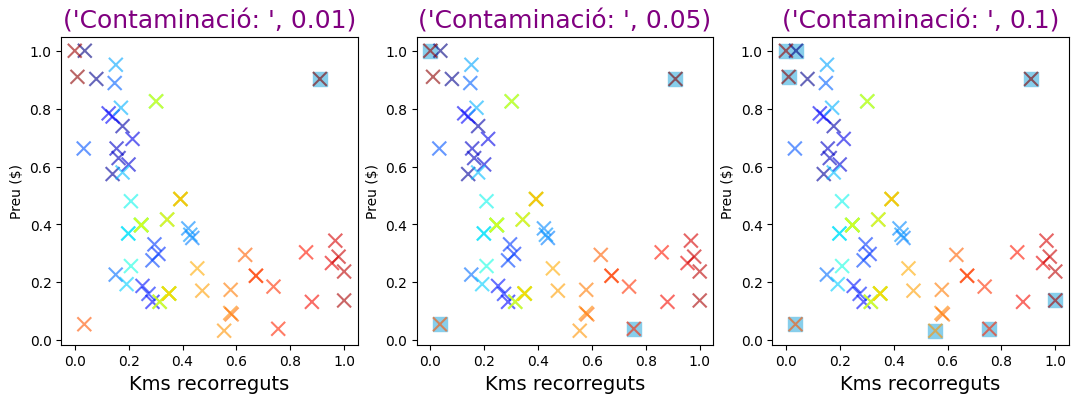

J= 0 . Es outlier: -1 , carro:  [0.0373 1.    ]
J= 1 . Es outlier: -1 , carro:  [0.0801 0.9025]
J= 16 . Es outlier: -1 , carro:  [0.0333 0.6623]
J= 17 . Es outlier: -1 , carro:  [0.1483 0.8884]
J= 18 . Es outlier: -1 , carro:  [0.152  0.2266]
J= 22 . Es outlier: -1 , carro:  [0.1525 0.9515]
J= 32 . Es outlier: -1 , carro:  [0.302  0.8252]
J= 41 . Es outlier: -1 , carro:  [0.302  0.8252]
J= 49 . Es outlier: -1 , carro:  [0.302  0.8252]
J= 58 . Es outlier: -1 , carro:  [0.5546 0.0328]
J= 59 . Es outlier: -1 , carro:  [0.5774 0.094 ]
J= 61 . Es outlier: -1 , carro:  [0.5825 0.0892]
J= 62 . Es outlier: -1 , carro:  [0.6327 0.2948]
J= 63 . Es outlier: -1 , carro:  [0.0355 0.0552]
J= 66 . Es outlier: -1 , carro:  [0.7378 0.1852]
J= 67 . Es outlier: -1 , carro:  [0.7553 0.0395]
J= 68 . Es outlier: -1 , carro:  [0.8587 0.3036]
J= 69 . Es outlier: -1 , carro:  [0.8803 0.1325]
J= 70 . Es outlier: -1 , carro:  [0.9548 0.2666]
J= 71 . Es outlier: -1 , carro:  [0.9673 0.3439]
J= 72 . Es outlier: -1

In [97]:
# Passem ara a representar una gràfica per a cada contaminació, marcant les dades que són 
# considerades outliers en cada representació.

plt.set_cmap("jet") # Estableix el mapa de color
fig = plt.figure(figsize=(13, 4)) # Grandària de la imatge

# Recorrem el vector amb les 3 contaminacion i anem repres
for i in range(len(c)):    
    ax = fig.add_subplot(1, 3, i+1)

 # Dibuixem un quadre blau per a tots aquells que siguen outliers, filtrant-los. 
    ax.scatter(cotxes.iloc[resultats[i]==-1].kms.values, cotxes.iloc[resultats[i]==-1].precio.values, c="skyblue", marker="s", s=100)

 # Dibuxa una X per a tots
    ax.scatter(cotxes.kms.values, cotxes.precio.values, c=range(cotxes.size//2), marker="x", s=100, alpha=0.6)

    tt="Contaminació: ", c[i]
    ax.set_title(tt, size=18, color="purple")
    ax.set_ylabel("Preu ($)", size=10)
    ax.set_xlabel("Kms recorreguts", size=14)
plt.show()


# Provem la contaminació per defecte,  auto
model = IsolationForest(contamination='auto').fit(cotxes.values)
resultats = model.predict(cotxes.values)
num=0
for j in range(len(resultats)): 
    if (resultats[j]==-1):
       print("J=",j,". Es outlier:", resultats[j], ", carro: ", cotxes.iloc[j].values)
       num=num+1;

print("Nombre d'outliers:", num)

